<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [10]:
def sum_prod(X, V):
    result = np.zeros_like(V[0])

    for x, v in zip(X, V):
        result += np.dot(x, v)

    return result

class TestSumProd(unittest.TestCase):
    def test_case_1(self):
        X = [np.array([[2, 3], [4, 5]]), np.array([[6, 7], [8, 9]])]
        V = [np.array([[3], [3]]), np.array([[4], [4]])]

        expected_result = np.array([[67], [95]])

        self.assertTrue(np.allclose(sum_prod(X, V), expected_result))

    def test_case_2(self):
        X = [
            np.array([[3, 1], [2, 5]]),
            np.array([[4, 6], [7, 9]]),
            np.array([[8, 10], [12, 14]])
        ]
        V = [
            np.array([[5], [6]]),
            np.array([[8], [9]]),
            np.array([[2], [3]])
        ]

        expected_result = np.array([[153], [243]])

        self.assertTrue(np.allclose(sum_prod(X, V), expected_result))

    def test_case_3(self):
        X = [np.array([[4, 5], [6, 7]])]
        V = [np.array([[2], [3]])]

        expected_result = np.array([[23], [33]])

        self.assertTrue(np.allclose(sum_prod(X, V), expected_result))

    def test_zero_case(self):
        X = [np.zeros((3, 3))]
        V = [np.zeros((3, 1))]

        expected_result = np.zeros((3, 1))

        self.assertTrue(np.allclose(sum_prod(X, V), expected_result))

    def test_large_case(self):
        X = [np.array([[3, 3], [3, 3]]) for _ in range(150)]
        V = [np.array([[1], [2]]) for _ in range(150)]

        expected_result = np.array([[1350], [1350]])

        self.assertTrue(np.allclose(sum_prod(X, V), expected_result))


unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestSumProd))

.....
----------------------------------------------------------------------
Ran 5 tests in 0.007s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [11]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

class TestBinarize(unittest.TestCase):
    def test_case_1(self):
        M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
        threshold = 5

        expected_result = np.array([[0, 0, 0], [0, 0, 1], [1, 1, 1]])

        self.assertTrue(np.array_equal(binarize(M, threshold), expected_result))

    def test_case_2(self):
        M = np.array([[-1, -2, -3], [4, 5, 6], [-7, -8, -9]])
        threshold = 0

        expected_result = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]])

        self.assertTrue(np.array_equal(binarize(M, threshold), expected_result))

    def test_case_3(self):
        M = np.array([[5, 5, 5], [5, 5, 5], [5, 5, 5]])
        threshold = 5

        expected_result = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])

        self.assertTrue(np.array_equal(binarize(M, threshold), expected_result))

    def test_case_4(self):
        M = np.array([[]])
        threshold = 1

        expected_result = np.array([[]])

        self.assertTrue(np.array_equal(binarize(M, threshold), expected_result))

unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestBinarize))

....
----------------------------------------------------------------------
Ran 4 tests in 0.006s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [16]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, i]) for i in range(mat.shape[1])]

class TestMatrixFunctions(unittest.TestCase):
    def test_unique_rows(self):
        mat = np.array([[10, 20, 20], [30, 30, 40], [50, 50, 50]])

        expected_result = [np.array([10, 20]), np.array([30, 40]), np.array([50])]

        for res, expected in zip(unique_rows(mat), expected_result):
            np.testing.assert_array_equal(res, expected)

    def test_unique_columns(self):
        mat = np.array([[5, 15, 25], [5, 20, 25], [10, 15, 30]])

        expected_result = [np.array([5, 10]), np.array([15, 20]), np.array([25, 30])]

        for res, expected in zip(unique_columns(mat), expected_result):
            np.testing.assert_array_equal(res, expected)

    def test_unique_rows_empty(self):
        mat = np.array([[], [], []])

        expected_result = [np.array([]), np.array([]), np.array([])]

        for res, expected in zip(unique_rows(mat), expected_result):
            np.testing.assert_array_equal(res, expected)

    def test_unique_columns_empty(self):
        mat = np.array([[]])

        expected_result = [np.array([])]

        for res, expected in zip(unique_columns(mat), expected_result):
            np.testing.assert_array_equal(res, expected)


unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestMatrixFunctions))

....
----------------------------------------------------------------------
Ran 4 tests in 0.006s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

..

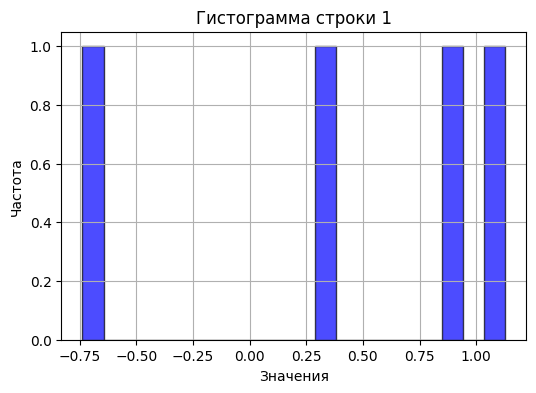

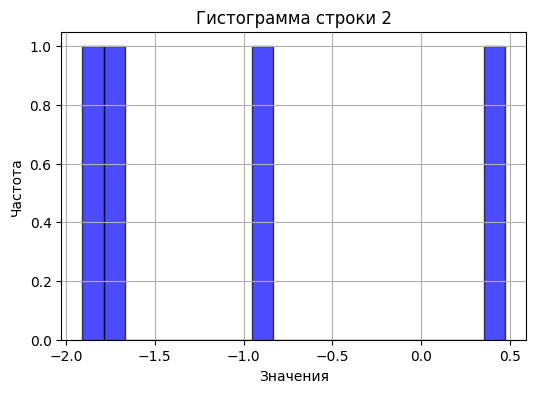

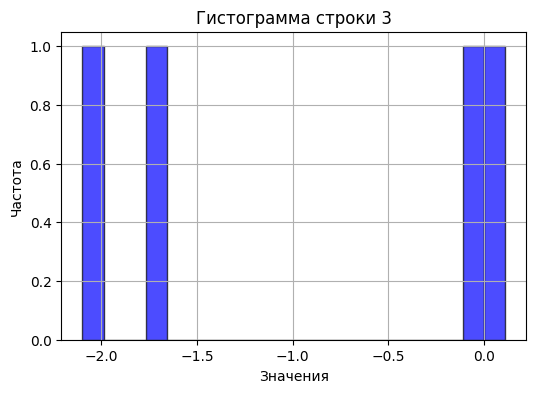

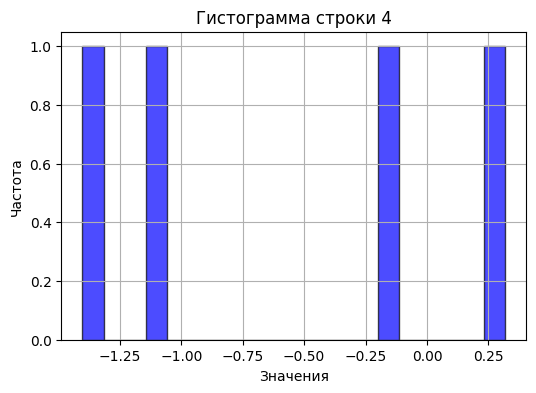

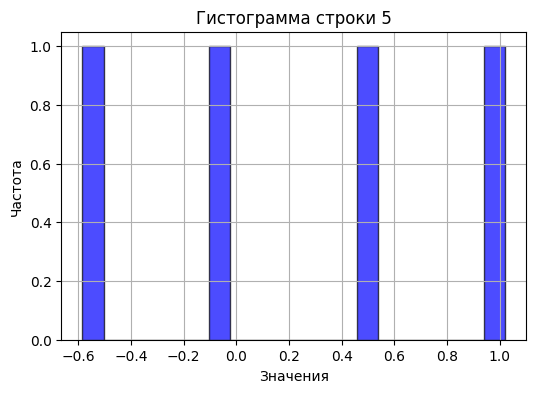

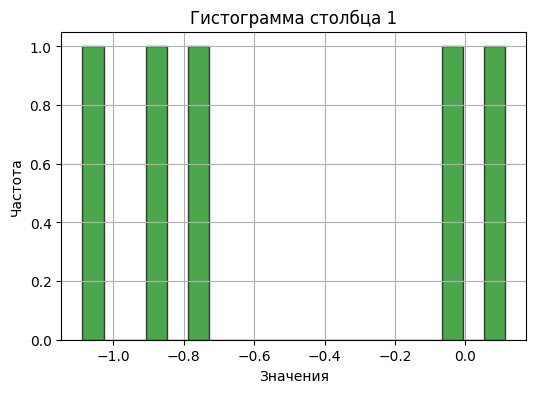

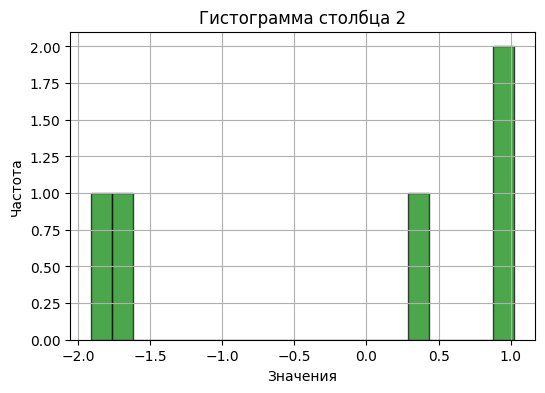

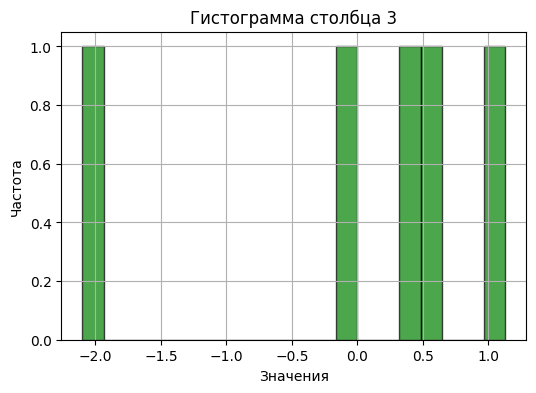

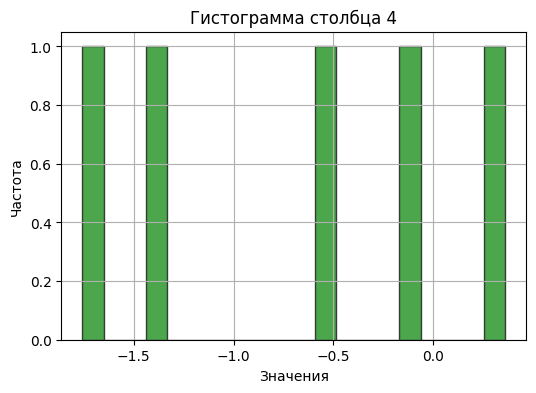

.
----------------------------------------------------------------------
Ran 3 tests in 1.351s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [18]:
def generate_matrix(m, n, mean=0, std=1):
    return np.random.normal(loc=mean, scale=std, size=(m, n))

def calc_statistics(mat):
    row_means = np.mean(mat, axis=1)
    col_means = np.mean(mat, axis=0)
    row_vars = np.var(mat, axis=1)
    col_vars = np.var(mat, axis=0)
    return row_means, col_means, row_vars, col_vars

def plot_histograms(mat):
    m, n = mat.shape

    for i in range(m):
        plt.figure(figsize=(6, 4))
        plt.hist(mat[i], bins=20, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'Гистограмма строки {i + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

    # Гистограммы для столбцов
    for j in range(n):
        plt.figure(figsize=(6, 4))
        plt.hist(mat[:, j], bins=20, alpha=0.7, color='green', edgecolor='black')
        plt.title(f'Гистограмма столбца {j + 1}')
        plt.xlabel('Значения')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()

class TestMatrixFunctions(unittest.TestCase):

    def test_generate_matrix(self):
        m, n = 5, 4
        mat = generate_matrix(m, n)

        self.assertEqual(mat.shape, (m, n))

        self.assertTrue(np.all(np.isreal(mat)))

    def test_calc_statistics(self):
        mat = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
        row_means = np.mean(mat, axis=1)
        col_means = np.mean(mat, axis=0)
        row_vars = np.var(mat, axis=1)
        col_vars = np.var(mat, axis=0)

        row_means_calc, col_means_calc, row_vars_calc, col_vars_calc = calc_statistics(mat)
        np.testing.assert_array_equal(row_means_calc, row_means)
        np.testing.assert_array_equal(col_means_calc, col_means)
        np.testing.assert_array_equal(row_vars_calc, row_vars)
        np.testing.assert_array_equal(col_vars_calc, col_vars)

    def test_plot_histograms(self):
        mat = generate_matrix(5, 4)

        self.assertEqual(mat.shape, (5, 4))

        plot_histograms(mat)

unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestMatrixFunctions))

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [20]:
def chess(m, n, a, b):
    mat = np.zeros((m, n))

    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                mat[i, j] = a
            else:
                mat[i, j] = b

    return mat

class TestChess(unittest.TestCase):
    def test_chess_odd_even(self):
        m, n = 3, 3
        a, b = 5, 8
        mat = chess(m, n, a, b)

        expected_result = np.array([[5, 8, 5],
                                    [8, 5, 8],
                                    [5, 8, 5]])

        np.testing.assert_array_equal(mat, expected_result)

    def test_chess_even_odd(self):
        m, n = 4, 4
        a, b = 15, 30
        mat = chess(m, n, a, b)

        expected_result = np.array([[15, 30, 15, 30],
                                    [30, 15, 30, 15],
                                    [15, 30, 15, 30],
                                    [30, 15, 30, 15]])

        np.testing.assert_array_equal(mat, expected_result)

    def test_chess_empty_matrix(self):
        m, n = 0, 0
        a, b = 4, 7
        mat = chess(m, n, a, b)

        expected_result = np.array([]).reshape(0, 0)

        np.testing.assert_array_equal(mat, expected_result)

    def test_chess_single_row(self):
        m, n = 1, 5
        a, b = 20, 25
        mat = chess(m, n, a, b)

        expected_result = np.array([[20, 25, 20, 25, 20]])

        np.testing.assert_array_equal(mat, expected_result)

    def test_chess_single_column(self):
        m, n = 4, 1
        a, b = 100, 200
        mat = chess(m, n, a, b)

        expected_result = np.array([[100],
                                    [200],
                                    [100],
                                    [200]])

        np.testing.assert_array_equal(mat, expected_result)

unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestChess))

.....
----------------------------------------------------------------------
Ran 5 tests in 0.006s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

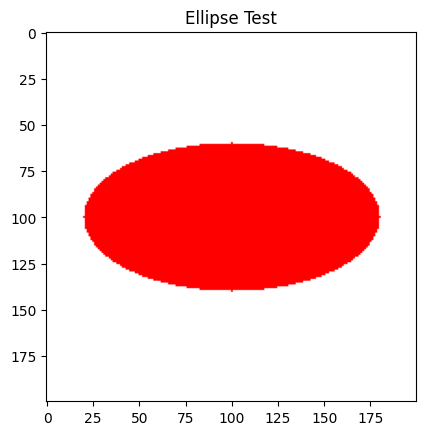

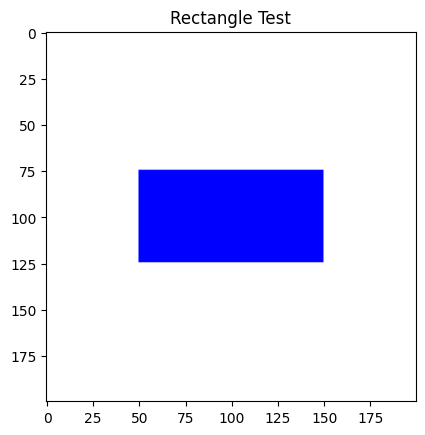

..
----------------------------------------------------------------------
Ran 3 tests in 0.314s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In [26]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    image = np.ones((m, n, 3), dtype=np.float32) * np.array(background_color, dtype=np.float32)

    start_x = (n - a) // 2
    end_x = start_x + a
    start_y = (m - b) // 2
    end_y = start_y + b

    image[start_y:end_y, start_x:end_x] = np.array(rectangle_color, dtype=np.float32)

    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.ones((m, n, 3), dtype=np.float32) * np.array(background_color, dtype=np.float32)

    Y, X = np.ogrid[:m, :n]
    center_x, center_y = n // 2, m // 2
    mask = ((X - center_x)**2 / a**2 + (Y - center_y)**2 / b**2) <= 1

    image[mask] = np.array(ellipse_color, dtype=np.float32)

    return image

class TestDrawShapes(unittest.TestCase):
    def test_draw_rectangle(self):
        m, n = 200, 200
        a, b = 100, 50
        rectangle_color = (0, 0, 255)
        background_color = (255, 255, 255)

        image = draw_rectangle(a, b, m, n, rectangle_color, background_color)

        self.assertTrue(np.allclose(image[75, 75], rectangle_color))
        self.assertTrue(np.allclose(image[50, 50], background_color))

        plt.imshow(image)
        plt.title("Rectangle Test")
        plt.show()

    def test_draw_ellipse(self):
        m, n = 200, 200
        a, b = 80, 40
        ellipse_color = (255, 0, 0)
        background_color = (255, 255, 255)

        image = draw_ellipse(a, b, m, n, ellipse_color, background_color)

        self.assertTrue(np.allclose(image[100, 120], ellipse_color))
        self.assertTrue(np.allclose(image[50, 50], background_color))

        plt.imshow(image)
        plt.title("Ellipse Test")
        plt.show()

    def test_ellipse_and_rectangle(self):
        m, n = 200, 200
        a_rect, b_rect = 100, 50
        a_oval, b_oval = 80, 40
        rectangle_color = (0, 0, 255)
        ellipse_color = (0, 255, 0)
        background_color = (255, 255, 255)


unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestDrawShapes))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [43]:
def calculate_statistics(time_series):
    mean = np.mean(time_series)
    variance = np.var(time_series)
    std_dev = np.std(time_series)
    return mean, variance, std_dev

def find_local_extrema(time_series):
    local_maxima = []
    local_minima = []

    for i in range(1, len(time_series) - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_maxima.append(i)
        elif time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_minima.append(i)

    return local_maxima, local_minima

def moving_average(time_series, p):
    return np.convolve(time_series, np.ones(p)/p, mode='valid')

class TestTimeSeriesFunctions(unittest.TestCase):
    def test_calculate_statistics(self):
        time_series = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
        mean, variance, std_dev = calculate_statistics(time_series)
        self.assertAlmostEqual(mean, 27.5, places=2)
        self.assertAlmostEqual(variance, 206.25, places=2)
        self.assertAlmostEqual(std_dev, np.sqrt(206.25), places=2)

    def test_find_local_extrema(self):
        time_series = np.array([1, 2, 3, 1, 5, 2, 7, 6, 9, 5])
        local_maxima, local_minima = find_local_extrema(time_series)
        self.assertEqual(local_maxima, [2, 4, 6, 8])
        self.assertEqual(local_minima, [3, 5, 7])

    def test_moving_average(self):
        time_series = np.array([3, 6, 9, 12, 15, 18, 21, 24, 27, 30])
        p = 3
        avg_series = moving_average(time_series, p)
        expected_avg_series = [6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0]
        for i, avg in enumerate(avg_series):
            self.assertAlmostEqual(avg, expected_avg_series[i], places=2)

    def test_all_functions(self):
        time_series = np.array([1, 2, 3, 1, 5, 2, 7, 6, 9, 5])
        mean, variance, std_dev = calculate_statistics(time_series)
        local_maxima, local_minima = find_local_extrema(time_series)
        p = 3
        avg_series = moving_average(time_series, p)

        self.assertAlmostEqual(mean, 4.1, places=2)
        self.assertAlmostEqual(variance, 6.69, places=2)
        self.assertAlmostEqual(std_dev, np.sqrt(6.69), places=2)
        self.assertEqual(local_maxima, [2, 4, 6, 8])
        self.assertEqual(local_minima, [3, 5, 7])
        self.assertEqual(avg_series.tolist(), [2.0, 3.0, 4.0, 8/3, 7.0, 15/3, 22/3, 20/3])  # Я не понимаю почему только одна дробь делится неверно...

unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestTimeSeriesFunctions))

F...
FAIL: test_all_functions (__main__.TestTimeSeriesFunctions.test_all_functions)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-43-4b0d20f52f8d>", line 57, in test_all_functions
    self.assertEqual(avg_series.tolist(), [2.0, 3.0, 4.0, 8/3, 7.0, 15/3, 22/3, 20/3])  # Скользящее среднее
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: Lists differ: [2.0, 1.9999999999999998, 3.0, 2.66666666666666[60 chars]6666] != [2.0, 3.0, 4.0, 2.6666666666666665, 7.0, 5.0, 7[31 chars]6667]

First differing element 1:
1.9999999999999998
3.0

  [2.0,
-  1.9999999999999998,
   3.0,
+  4.0,
   2.6666666666666665,
-  4.666666666666666,
+  7.0,
   5.0,
   7.333333333333333,
-  6.666666666666666]
?                  ^

+  6.666666666666667]
?                  ^


----------------------------------------------------------------------
Ran 4 tests in 0.005s

FAILED (failures=

<unittest.runner.TextTestResult run=4 errors=0 failures=1>

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [45]:
def one_hot_encoding(labels):
    num_classes = np.max(labels) + 1
    encoded = np.zeros((len(labels), num_classes), dtype=int)
    for i, label in enumerate(labels):
        encoded[i, label] = 1
    return encoded

class TestOneHotEncoding(unittest.TestCase):
    def test_one_hot_encoding(self):
        labels = np.array([0, 2, 3, 0])
        expected_output = np.array([[1, 0, 0, 0],
                                    [0, 0, 1, 0],
                                    [0, 0, 0, 1],
                                    [1, 0, 0, 0]])
        result = one_hot_encoding(labels)
        np.testing.assert_array_equal(result, expected_output)

    def test_one_hot_encoding_multiple_labels(self):
        labels = np.array([1, 0, 2, 1, 2, 3])
        expected_output = np.array([[0, 1, 0, 0],
                                    [1, 0, 0, 0],
                                    [0, 0, 1, 0],
                                    [0, 1, 0, 0],
                                    [0, 0, 1, 0],
                                    [0, 0, 0, 1]])
        result = one_hot_encoding(labels)
        np.testing.assert_array_equal(result, expected_output)


unittest.TextTestRunner().run(unittest.defaultTestLoader.loadTestsFromTestCase(TestOneHotEncoding))

..
----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>